# Can we make a change on climate change?
#### EPA1333 Final Assignment
### Introduction
Regardless of the many debates over the impact of humans on climate change, global warming is an observable fact. According to NASA, highest 16 global temperatures have been recorded since 2001, the arctic ice shrank to a minimum in 2012, and carbon dioxide levels in the air are higher than ever!

Data analysis can help us better understand how the climate has changed, why, to make predictions for the future years, and to evaluate measures on how to suppress these changes. In this assignment you receive climate change data from World Bank, and are expected to perform an original and non-trivial analysis using Python.

### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

In [4]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[61]], 1)

# display the head of dataframe
wb.head(8)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,NaN


In [6]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[5]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [7]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[4]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides programmatic access to most of the climate data used on the World Bank’s Climate Change Knowledge Portal. You can access this data directly from Python using requests. In addition to what was already downloadable as csv data, with this API you are able to access temperature, precipitation and basin level data. Read about it in more detail here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. You can select a country using its ISO aplha3 code: https://unstats.un.org/unsd/methodology/m49/.


In [8]:
import requests
r = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/IDN')
rou = r.json()
rou[:]

[{'data': 25.897385, 'year': 1901},
 {'data': 25.891254, 'year': 1902},
 {'data': 25.89029, 'year': 1903},
 {'data': 25.81223, 'year': 1904},
 {'data': 25.89114, 'year': 1905},
 {'data': 25.93108, 'year': 1906},
 {'data': 25.845016, 'year': 1907},
 {'data': 25.859482, 'year': 1908},
 {'data': 25.884674, 'year': 1909},
 {'data': 25.87435, 'year': 1910},
 {'data': 26.001455, 'year': 1911},
 {'data': 26.063465, 'year': 1912},
 {'data': 25.996037, 'year': 1913},
 {'data': 26.086746, 'year': 1914},
 {'data': 26.122044, 'year': 1915},
 {'data': 26.017483, 'year': 1916},
 {'data': 25.89649, 'year': 1917},
 {'data': 25.81522, 'year': 1918},
 {'data': 26.058826, 'year': 1919},
 {'data': 26.046621, 'year': 1920},
 {'data': 25.961288, 'year': 1921},
 {'data': 25.94628, 'year': 1922},
 {'data': 25.913263, 'year': 1923},
 {'data': 25.936886, 'year': 1924},
 {'data': 25.812534, 'year': 1925},
 {'data': 26.039835, 'year': 1926},
 {'data': 25.97557, 'year': 1927},
 {'data': 25.980175, 'year': 1928},
 

As with most data sources, you might find that you data contains missing values. Please handle them appropriately, for example by using interpolation.

#### Other resources
You are encouraged to find more data sources that will make your analysis more meaningful. Please make sure that you document everything carefully. Only use freely available datasets.

#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of visualizations of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your research questions. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, document carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) functions.
    * Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

In [9]:
years_column = wb.columns.values[range(4,61)]
years_column

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [10]:
wb_prep = pd.DataFrame()
wb_prep = wb[years_column]
wb_prep.columns = range(0,57)
wb_prep

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,97.700000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,98.100000,NaN


In [81]:
# wb_interpolated = wb_prep.interpolate(method='krogh',limit_direction='both',limit=56,axis=1)
# wb_interpolated = wb_prep.interpolate(method='pchip',limit_direction='both',limit=56,axis=1)
# wb_interpolated = wb_prep.interpolate(method='barycentric',limit_direction='both',limit=56,axis=1)
# wb_interpolated = wb_prep.interpolate(method='index',order = 3, limit_direction='both',limit=56,axis=1)
wb_interpolated = wb_prep.interpolate(method='linear', limit_direction='both',limit=56,axis=1)

In [82]:
wb_interpolated

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,4.414700e+01,4.378300e+01,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,4.468600e+04,4.437500e+04,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-4.354289e-01,-6.984006e-01,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,3.840600e-01,1.313107e-01,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,9.790000e+01,9.780000e+01,9.780000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01,9.770000e+01
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,9.650000e+01,9.680000e+01,9.710000e+01,9.740000e+01,9.780000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01,9.810000e+01


In [128]:
wb_inter = pd.DataFrame()
wb_inter = wb[wb.columns.values]

# replace wb_inter annual value with the interpolated one
wb_inter[list(wb.columns.values[range(4,61)])] = wb_interpolated[list(range(0,57))]

# now we have interpolated world bank data
wb_inter.head(30)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000
8,Aruba,ABW,"Community health workers (per 1,000 people)",SH.MED.CMHW.P3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aruba,ABW,Improved water source (% of population with ac...,SH.H2O.SAFE.ZS,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,96.500000,96.800000,97.100000,97.400000,97.800000,98.100000,98.100000,98.100000,98.100000,98.100000


## Global Temperature Anomaly

In [90]:
df_tempe = pd.read_csv('647_Global_Temperature_Data_File.txt', sep="     ", 
                   names=['year', 'annual mean', '5 year mean'],
                   index_col = 'year',
                   engine='python')

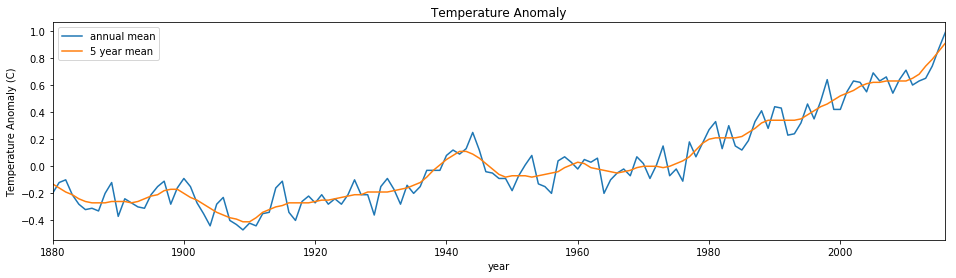

In [91]:
df_tempe.plot(figsize = (16,4))
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly')

In [92]:
df_tempe_since_1960 = df_tempe[80:]
df_tempe_since_1960.head()

,annual mean,5 year mean
year,,
1960,-0.02,0.03
1961,0.05,0.02
1962,0.03,-0.01
1963,0.06,-0.02
1964,-0.20,-0.03


### Prepare the training set for anomaly temperature

In [93]:
# create a dataframe for each year
dict_df_temp = {}
range_tempe = range(1960, 2017)
for year in range_tempe:
    year = str(year)
    dict_df_temp[year] = pd.DataFrame()
    # print(year)
    dict_df_temp[year] = wb_inter[['Country Name', year]]
    dict_df_temp[year] = dict_df_temp[year].fillna(0)
    
dict_df_temp[year].head(100)

,Country Name,2016
0,Aruba,4.130400e+01
1,Aruba,4.329600e+04
2,Aruba,-8.080622e-02
3,Aruba,1.048220e+05
4,Aruba,4.599292e-01
5,Aruba,0.000000e+00
6,Aruba,0.000000e+00
7,Aruba,9.770000e+01
8,Aruba,0.000000e+00
9,Aruba,9.810000e+01


In [94]:
# features matrix

X_tempe = pd.DataFrame()

for year in range_tempe:
    year = str(year)
    # axis 1 = concat to the right column of the original df
    X_tempe = pd.concat([X_tempe,dict_df_temp[year][year]], ignore_index=True, axis=1) 
    print(dict_df_temp[year][year])
    
X_tempe.head()

0            50.776000
1         27526.000000
2             3.117931
3         54211.000000
4             3.148037
5             0.000000
6             0.000000
7            98.600000
8             0.000000
9            91.000000
10           91.000000
11           91.000000
12            0.000000
13          101.619118
14            1.011770
15            0.548948
16            0.000000
17            0.000000
18            0.480000
19            0.000000
20            0.480000
21            0.000000
22            0.000000
23            0.000000
24            7.070368
25            4.717904
26            2.352464
27            0.000000
28            0.000000
29            0.000000
             ...      
21090         0.000000
21091         0.000000
21092         1.607209
21093      1016.468471
21094       665.271963
21095       352.133292
21096        63.976402
21097         0.000000
21098         0.000000
21099        46.667379
21100         0.000000
21101         0.000000
21102      

Name: 1988, Length: 21120, dtype: float64
0            50.335000
1         30720.000000
2            -0.107364
3         61032.000000
4            -0.076979
5             0.000000
6             0.000000
7            98.600000
8             0.000000
9            91.000000
10           91.000000
11           91.000000
12            0.000000
13          101.619118
14            1.011770
15            0.548948
16            0.000000
17            0.000000
18            0.480000
19            0.000000
20            0.480000
21            0.000000
22            0.000000
23            0.000000
24            7.070368
25            4.717904
26            2.352464
27            0.000000
28            0.000000
29            0.000000
             ...      
21090         0.000000
21091         0.000000
21092         1.828595
21093       893.879651
21094       906.131154
21095       352.133292
21096        63.976402
21097         0.000000
21098         0.000000
21099        46.667379
21100         0

Name: 2002, Length: 21120, dtype: float64
0            45.606000
1         44246.000000
2             1.310360
3         97017.000000
4             2.109354
5             0.000000
6             0.000000
7            98.000000
8             0.000000
9            95.200000
10           95.200000
11           95.200000
12            0.000000
13           90.155090
14            0.977540
15            0.435108
16            0.000000
17            0.000000
18            0.480000
19            0.000000
20            0.480000
21            0.000000
22            0.000000
23            0.000000
24            7.070007
25            4.717946
26            2.352062
27            0.000000
28            0.000000
29            0.000000
             ...      
21090         0.000000
21091         0.000000
21092         1.136271
21093       742.313555
21094       834.263569
21095       389.117645
21096        77.832863
21097         0.000000
21098         0.000000
21099        60.734174
21100         0

0        4.177900e+01
1        4.336500e+04
2       -7.606930e-02
3        1.037950e+05
4        5.874924e-01
5        0.000000e+00
6        0.000000e+00
7        9.770000e+01
8        0.000000e+00
9        9.810000e+01
10       9.810000e+01
11       9.810000e+01
12       0.000000e+00
13       1.011103e+02
14       1.021430e+00
15       5.124184e-01
16       0.000000e+00
17       0.000000e+00
18       4.800000e-01
19       0.000000e+00
20       4.800000e-01
21       0.000000e+00
22       0.000000e+00
23       0.000000e+00
24       7.069167e+00
25       4.718044e+00
26       2.351123e+00
27       0.000000e+00
28       0.000000e+00
29       0.000000e+00
             ...     
21090    0.000000e+00
21091    0.000000e+00
21092    1.034544e+00
21093    7.496671e+02
21094    5.369955e+02
21095    3.943160e+02
21096    8.113041e+01
21097    1.436696e+00
21098    1.440000e+08
21099    5.562207e+01
21100    5.088297e-01
21101    0.000000e+00
21102    0.000000e+00
21103    5.418537e+01
21104    4

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [95]:
X_tempe_train = X_tempe.T
# X_tempe_train = df_ccpi_clean_reset.iloc[:,4:61].T
# X_tempe_train = X_tempe_train.reset_index()
dataset_tempe = X_tempe_train[X_tempe_train.columns.values]
dataset_tempe.head(20)


,0,1,2,3,4,5,6,7,8,9,...,21110,21111,21112,21113,21114,21115,21116,21117,21118,21119
0,50.776,27526.0,3.117931,54211.0,3.148037,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
1,50.761,28141.0,2.209658,55438.0,2.238144,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
2,50.746,28532.0,1.379868,56225.0,1.409622,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.001939,28.615743,110700.0
3,50.730,28761.0,0.799404,56695.0,0.832453,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.131188,28.835466,111550.0
4,50.715,28924.0,0.565140,57032.0,0.592649,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.260437,29.055189,112400.0
5,50.700,29082.0,0.544773,57360.0,0.573468,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.337986,29.223213,113050.0
6,50.685,29253.0,0.586271,57715.0,0.616991,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.518935,29.494636,114100.0
7,50.670,29416.0,0.555661,58055.0,0.587373,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.648184,29.714360,114950.0
8,50.654,29575.0,0.539067,58386.0,0.568530,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.777433,29.934083,115800.0
9,50.639,29738.0,0.549628,58726.0,0.580642,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.906682,30.153806,116650.0


In [96]:
# y_tempe_train = df_tempe_since_1960[['annual mean']]
y_tempe_train = df_tempe_since_1960[['5 year mean']]
y_tempe_train = y_tempe_train.reset_index(drop=True)
y_tempe_train.head()

,5 year mean
0,0.03
1,0.02
2,-0.01
3,-0.02
4,-0.03


In [97]:
dataset_tempe['target'] = y_tempe_train 
dataset_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,21111,21112,21113,21114,21115,21116,21117,21118,21119,target
0,50.776,27526.0,3.117931,54211.0,3.148037,0.0,0.0,98.6,0.0,91.0,...,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0,0.03
1,50.761,28141.0,2.209658,55438.0,2.238144,0.0,0.0,98.6,0.0,91.0,...,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0,0.02
2,50.746,28532.0,1.379868,56225.0,1.409622,0.0,0.0,98.6,0.0,91.0,...,221640.0,0.0,0.0,0.0,0.0,0.0,5.001939,28.615743,110700.0,-0.01
3,50.730,28761.0,0.799404,56695.0,0.832453,0.0,0.0,98.6,0.0,91.0,...,221640.0,0.0,0.0,0.0,0.0,0.0,5.131188,28.835466,111550.0,-0.02
4,50.715,28924.0,0.565140,57032.0,0.592649,0.0,0.0,98.6,0.0,91.0,...,221640.0,0.0,0.0,0.0,0.0,0.0,5.260437,29.055189,112400.0,-0.03


In [98]:
from sklearn.linear_model import LinearRegression
LR_tempe = LinearRegression(fit_intercept=True)
LR_tempe.fit(X_tempe_train, y_tempe_train)
dataset_tempe['predicted'] = LR_tempe.predict(X_tempe_train)

In [99]:
dataset_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,21112,21113,21114,21115,21116,21117,21118,21119,target,predicted
0,50.776,27526.0,3.117931,54211.0,3.148037,0.0,0.0,98.6,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0,0.03,0.03
1,50.761,28141.0,2.209658,55438.0,2.238144,0.0,0.0,98.6,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0,0.02,0.02
2,50.746,28532.0,1.379868,56225.0,1.409622,0.0,0.0,98.6,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,5.001939,28.615743,110700.0,-0.01,-0.01
3,50.730,28761.0,0.799404,56695.0,0.832453,0.0,0.0,98.6,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,5.131188,28.835466,111550.0,-0.02,-0.02
4,50.715,28924.0,0.565140,57032.0,0.592649,0.0,0.0,98.6,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,5.260437,29.055189,112400.0,-0.03,-0.03


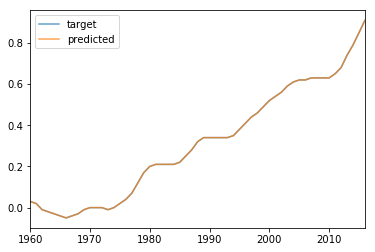

In [100]:
# krough
dataset_tempe[['target', 'predicted']].plot(x = years_column,alpha=0.7);

In [129]:
params_tempe = pd.Series(LR_tempe.coef_[0], index=X_tempe_train.columns.values)
params_tempe

0        1.468119e-17
1       -3.654048e-14
2        1.316123e-15
3       -1.117887e-13
4        1.289519e-15
5       -2.347893e-20
6       -9.837222e-20
7       -2.505755e-19
8        3.180592e-20
9        2.496130e-18
10       2.688618e-18
11       2.863840e-18
12      -5.363232e-21
13       3.012791e-17
14      -6.913275e-21
15       5.436415e-20
16       1.411152e-20
17      -1.396219e-20
18      -1.104100e-20
19      -4.584132e-21
20      -2.161485e-20
21      -1.208066e-20
22       1.350372e-22
23       1.051440e-20
24      -2.363055e-21
25       8.737321e-22
26      -2.626845e-21
27      -5.417516e-21
28       9.015235e-21
29      -1.759000e-21
             ...     
21090    0.000000e+00
21091    0.000000e+00
21092   -2.860057e-17
21093   -2.174758e-15
21094   -8.780745e-15
21095   -2.484507e-16
21096    4.924495e-17
21097    1.689944e-18
21098    1.396875e-10
21099   -1.536713e-16
21100   -7.097024e-18
21101    0.000000e+00
21102    0.000000e+00
21103    1.578065e-16
21104   -1

In [130]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([LR_tempe.fit(*resample(X_tempe_train, y_tempe_train)).coef_ for i in range(1000)], 0)

In [132]:
params_tempe.nlargest(10)*10**20

9363     4.23562e+11
4883     3.75854e+11
4881     3.14859e+11
9361     2.63174e+11
14698    1.81688e+11
16538    1.81156e+11
1258       1.734e+11
9978     1.63559e+11
3498     1.39058e+11
3018     1.26401e+11
dtype: object

In [133]:
params_tempe.nsmallest(10)*10**20

5043    -2.61298e+11
5041    -1.59064e+11
5683    -1.55084e+11
3738    -1.40498e+11
5681    -1.20488e+11
14378   -1.20364e+11
7258    -1.20276e+11
13443   -1.13064e+11
15098   -1.07356e+11
5283    -1.06879e+11
dtype: object

In [155]:
params_tempe.min()

-2.4977225547388923e-17

In [143]:
params_tempe.head(39)*10**20

0         202.383
1         -4.2142
2          0.1765
3        0.240496
4      0.00960744
5         -2.2101
6       -0.945674
7         88.4258
8         8.89871
9        0.986603
10      -0.138517
11       -7.88738
12    0.000122062
13    0.000298803
14    4.32143e-06
15    4.78779e-05
16    0.000143195
17    0.000157423
18    7.83727e-06
19    -0.00125432
20    3.65574e-05
21    5.25384e-07
22    7.20176e-05
23   -0.000209813
24    1.96724e-06
25    0.000101753
26    1.04944e-05
27    -4.1653e-05
28    0.000130894
29     9.1957e-09
30   -3.01463e-08
31   -7.11627e-08
32   -0.000534798
33     0.00114386
34   -8.21954e-05
35    0.000164562
36    4.22742e-11
37   -9.78854e-11
38        1547.72
dtype: object

In [130]:
print(pd.DataFrame({'effect': params_tempe*10**20, 'error': err[0]*10**20}))

            effect        error
0          202.383      43314.1
1          -4.2142      2882.69
2           0.1765      9868.91
3         0.240496      2667.46
4       0.00960744      366.422
5          -2.2101      5809.66
6        -0.945674      1663.41
7          88.4258      8493.18
8          8.89871       2231.7
9         0.986603      7682.13
10       -0.138517      5463.21
11        -7.88738      7584.79
12     0.000122062      253.583
13     0.000298803      3208.46
14     4.32143e-06      67.9274
15     4.78779e-05      751.127
16     0.000143195      181.611
17     0.000157423      96.5368
18     7.83727e-06      62.1155
19     -0.00125432       88.669
20     3.65574e-05      52.1147
21     5.25384e-07      10.2576
22     7.20176e-05      27.1516
23    -0.000209813       82.809
24     1.96724e-06    0.0365893
25     0.000101753    0.0175742
26     1.04944e-05    0.0313229
27     -4.1653e-05    0.0158254
28     0.000130894    0.0080479
29      9.1957e-09    0.0049984
...     

In [101]:
 X_tempe_train_extend =  X_tempe_train[X_tempe_train.columns.values]

In [102]:
for i in range(57,61):
    X_tempe_train_extend.loc[i,:] = np.nan
    
X_tempe_train_extend

,0,1,2,3,4,5,6,7,8,9,...,21110,21111,21112,21113,21114,21115,21116,21117,21118,21119
0,50.776,27526.0,3.117931,54211.0,3.148037,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
1,50.761,28141.0,2.209658,55438.0,2.238144,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
2,50.746,28532.0,1.379868,56225.0,1.409622,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.001939,28.615743,110700.0
3,50.730,28761.0,0.799404,56695.0,0.832453,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.131188,28.835466,111550.0
4,50.715,28924.0,0.565140,57032.0,0.592649,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.260437,29.055189,112400.0
5,50.700,29082.0,0.544773,57360.0,0.573468,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.337986,29.223213,113050.0
6,50.685,29253.0,0.586271,57715.0,0.616991,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.518935,29.494636,114100.0
7,50.670,29416.0,0.555661,58055.0,0.587373,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.648184,29.714360,114950.0
8,50.654,29575.0,0.539067,58386.0,0.568530,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.777433,29.934083,115800.0
9,50.639,29738.0,0.549628,58726.0,0.580642,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.906682,30.153806,116650.0


In [80]:
# X_tempe_train_extend[0].interpolate(method='from_derivatives',limit_direction='both',limit=4)[55:]

55    41.528
56    41.304
57       NaN
58       NaN
59       NaN
60       NaN
Name: 0, dtype: float64

In [103]:
X_tempe_train_extend_inter = X_tempe_train_extend.interpolate(method='pchip',limit_direction='both',limit=5,axis=0)

In [104]:
X_tempe_train_extend_inter

,0,1,2,3,4,5,6,7,8,9,...,21110,21111,21112,21113,21114,21115,21116,21117,21118,21119
0,50.776000,27526.000000,3.117931,54211.000000,3.148037,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
1,50.761000,28141.000000,2.209658,55438.000000,2.238144,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,4.872690,28.396019,109850.0
2,50.746000,28532.000000,1.379868,56225.000000,1.409622,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.001939,28.615743,110700.0
3,50.730000,28761.000000,0.799404,56695.000000,0.832453,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.131188,28.835466,111550.0
4,50.715000,28924.000000,0.565140,57032.000000,0.592649,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.260437,29.055189,112400.0
5,50.700000,29082.000000,0.544773,57360.000000,0.573468,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.337986,29.223213,113050.0
6,50.685000,29253.000000,0.586271,57715.000000,0.616991,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.518935,29.494636,114100.0
7,50.670000,29416.000000,0.555661,58055.000000,0.587373,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.648184,29.714360,114950.0
8,50.654000,29575.000000,0.539067,58386.000000,0.568530,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.777433,29.934083,115800.0
9,50.639000,29738.000000,0.549628,58726.000000,0.580642,0.0,0.0,98.6,0.0,91.0,...,57.293525,221640.0,0.0,0.0,0.0,0.0,0.0,5.906682,30.153806,116650.0


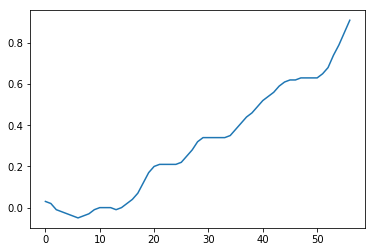

In [105]:
#LR_tempe.fit(X_tempe_train, y_tempe_train)
dataset_tempe['predicted'] = LR_tempe.predict(X_tempe_train)
plt.plot(dataset_tempe['predicted'])

In [297]:
X_tempe_train

,0,1,2,3,4,5,6,7,8,9,...,21110,21111,21112,21113,21114,21115,21116,21117,21118,21119
0,50.776,27526.0,3.117931,54211.0,3.148037,0.0,0.0,8.636205e+20,0.0,9.072318e+20,...,-6.107206e+17,-2.362573e+21,0.0,0.0,0.0,0.0,0.0,-4.623900e+13,6.142885e+13,2.362793e+17
1,50.761,28141.0,2.209658,55438.0,2.238144,0.0,0.0,4.671991e+20,0.0,4.899905e+20,...,-3.285001e+17,-1.270803e+21,0.0,0.0,0.0,0.0,0.0,4.872690e+00,2.839602e+01,1.098500e+05
2,50.746,28532.0,1.379868,56225.0,1.409622,0.0,0.0,2.487142e+20,0.0,2.604023e+20,...,-1.738335e+17,-6.724749e+20,0.0,0.0,0.0,0.0,0.0,5.001939e+00,2.861574e+01,1.107000e+05
3,50.730,28761.0,0.799404,56695.0,0.832453,0.0,0.0,1.301754e+20,0.0,1.360496e+20,...,-9.041458e+16,-3.497688e+20,0.0,0.0,0.0,0.0,0.0,5.131188e+00,2.883547e+01,1.115500e+05
4,50.715,28924.0,0.565140,57032.0,0.592649,0.0,0.0,6.692089e+19,0.0,6.981012e+19,...,-4.617604e+16,-1.786320e+20,0.0,0.0,0.0,0.0,0.0,5.260437e+00,2.905519e+01,1.124000e+05
5,50.700,29082.0,0.544773,57360.0,0.573468,0.0,0.0,3.375478e+19,0.0,3.514317e+19,...,-2.313098e+16,-8.948221e+19,0.0,0.0,0.0,0.0,0.0,5.337986e+00,2.922321e+01,1.130500e+05
6,50.685,29253.0,0.586271,57715.0,0.616991,0.0,0.0,1.668555e+19,0.0,1.733618e+19,...,-1.135145e+16,-4.391307e+19,0.0,0.0,0.0,0.0,0.0,5.518935e+00,2.949464e+01,1.141000e+05
7,50.670,29416.0,0.555661,58055.0,0.587373,0.0,0.0,8.072689e+18,0.0,8.369380e+18,...,-5.450251e+15,-2.108430e+19,0.0,0.0,0.0,0.0,0.0,5.648184e+00,2.971436e+01,1.149500e+05
8,50.654,29575.0,0.539067,58386.0,0.568530,0.0,0.0,3.817251e+18,0.0,3.948566e+18,...,-2.556579e+15,-9.890126e+18,0.0,0.0,0.0,0.0,0.0,5.777433e+00,2.993408e+01,1.158000e+05
9,50.639,29738.0,0.549628,58726.0,0.580642,0.0,0.0,1.761383e+18,0.0,1.817623e+18,...,-1.169716e+15,-4.525047e+18,0.0,0.0,0.0,0.0,0.0,5.906682e+00,3.015381e+01,1.166500e+05


In [107]:
y_forecast = LR_tempe.predict(X_tempe_train_extend_inter)

In [108]:
y_forecast 

array([[  3.00000000e-02],
       [  2.00000000e-02],
       [ -1.00000000e-02],
       [ -2.00000000e-02],
       [ -3.00000000e-02],
       [ -4.00000000e-02],
       [ -5.00000000e-02],
       [ -4.00000000e-02],
       [ -3.00000000e-02],
       [ -1.00000000e-02],
       [  1.13242749e-13],
       [  1.13686838e-13],
       [  1.64313008e-13],
       [ -1.00000000e-02],
       [  5.90638649e-14],
       [  2.00000000e-02],
       [  4.00000000e-02],
       [  7.00000000e-02],
       [  1.20000000e-01],
       [  1.70000000e-01],
       [  2.00000000e-01],
       [  2.10000000e-01],
       [  2.10000000e-01],
       [  2.10000000e-01],
       [  2.10000000e-01],
       [  2.20000000e-01],
       [  2.50000000e-01],
       [  2.80000000e-01],
       [  3.20000000e-01],
       [  3.40000000e-01],
       [  3.40000000e-01],
       [  3.40000000e-01],
       [  3.40000000e-01],
       [  3.40000000e-01],
       [  3.50000000e-01],
       [  3.80000000e-01],
       [  4.10000000e-01],
 

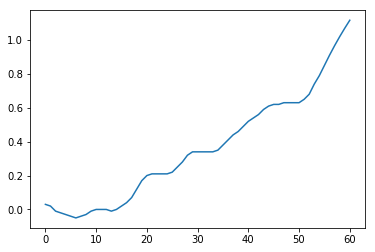

In [109]:
plt.plot(y_forecast)

In [113]:
ori = dataset_tempe['predicted'] 
ori[58] = np.nan

In [118]:
ori[60] = np.nan

In [119]:
ori_inter = ori.interpolate(method='pchip', limit = 4)

In [ ]:
plt.plot()

In [123]:
a = pd.DataFrame()

In [124]:
a['1'] = ori_inter
a['2'] = y_forecast

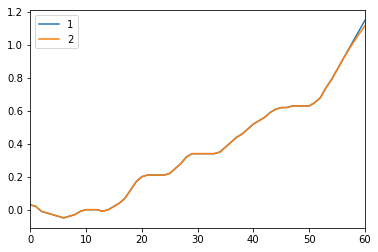

In [126]:
a.plot()

In [186]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# create a base classifier used to evaluate a subset of attributes
RFEmodel = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(RFEmodel, 264)
rfe = rfe.fit(X_tempe_train, target_int) #dataset_tempe.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

KeyboardInterrupt: 

## Classify the class of the countries

### Prepare the training set

In [ ]:
# load label Climate Change Performance Index
# the data were extracted from https://germanwatch.org/en/download/16484.pdf
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y.head()

# rename the CCPI column to Country Name, so it could be 'merge' on this column name
country_class_y.columns = ['Country Name', 'Label']
label_int = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})
country_class_y.head()

In [ ]:
# create a df of countries in CCPI results
df_ccpi = pd.DataFrame()
for country in country_class_y['Countries']:
    # filter the CCPI countries
    df1 = wb_inter[wb_inter['Country Name'] == country]
    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi

In [ ]:
print(df_ccpi.shape)
print(df1.shape)
# check the number of the countries
df_ccpi.shape[0] / df1.shape[0]

In [ ]:
#years = list(df_ccpi.columns[49:61])
years = list(df_ccpi.columns[4:61])
years

In [ ]:
df_ccpi

In [ ]:
df_ccpi[:80].isnull().any(axis=1).sum()

In [ ]:
df_ccpi[i:i+80]['Indicator Name']

In [ ]:
df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]

In [ ]:
df_ccpi[i:i+80].isnull().any(axis=1)

In [ ]:
list_indi = []
for c, i in enumerate(range(0,4480,80)):
    print(c, df_ccpi['Country Name'][i],'\t',df_ccpi[i:i+80].isnull().any(axis=1).sum())
    for i in df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]:
        print(i)
        list_indi.append(i)
        

In [ ]:
len(set(list_indi))

In [ ]:
set_saved_ccpi = set(wb_meta_indi['INDICATOR_NAME']) - set(list_indi)

In [ ]:
df_ccpi.columns.values

In [ ]:
df_ccpi_clean = pd.DataFrame()
array_flag = np.ones((len(df_ccpi)), dtype=bool)
array_flag


In [ ]:
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))
series_flag

In [ ]:
for indi in sorted(set(list_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))


In [ ]:
df_ccpi_clean = df_ccpi[series_flag]

In [ ]:
for c, i in enumerate(range(0,4480,80)):
    # print(i)
    print(c, df_ccpi['Country Name'][i],'\t',df_ccpi[i:i+80].isnull().any(axis=1).sum())

In [ ]:
for i in range(0,21120,80):
    #print(i)
    print(wb_inter['Country Name'][i],'\t',wb_interpolated[i:i+80].isnull().any(axis=1).sum())


In [ ]:
# store as a dictionary: data of CCPI country for each year in one dataframe

dict_df_years = {}
for year in years:
    dict_df_years[year] = df_ccpi[['Country Name','Indicator Name',year]]
    dict_df_years[year] = pd.merge(dict_df_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_years[year].head()

In [ ]:
# the number of features of each country
len(wb_meta_indi['INDICATOR_NAME'])

In [ ]:
df_ccpi

In [ ]:
df_ccpi.loc[6][2]

In [ ]:
len(df_ccpi)

In [ ]:
# imputation of the data, filling missing value
# we will still have an indicator with NaN value in one category, because the value is NaN for each country
# fillna.mean will not really work
# at the end we will end up deleted these unnecessary category

list_deleted_indi_inter = []
list_saved_indi_inter = []

for i in range(len(df_ccpi)):

    indicator = df_ccpi.loc[i][2] 
    if(df_ccpi.loc[i].isnull().any()):
        list_deleted_indi_inter.append(indicator) 
    else:
        list_saved_indi_inter.append(indicator) 

print(list_deleted_indi_inter)
  

In [ ]:
len(set(list_deleted_indi_inter))

In [ ]:
(set(list_deleted_indi_inter))

In [ ]:
# imputation of the data, filling missing value
# we will still have an indicator with NaN value in one category, because the value is NaN for each country
# fillna.mean will not really work
# at the end we will end up deleted these unnecessary category

list_deleted_indi = {}
list_saved_indi = {}
df_test = {}

for year in years:
    list_deleted_indi[year] = []
    list_saved_indi[year] = []
    df_test[year] = pd.DataFrame()

    for label in country_class_y['Label'].unique():
        for indicator in wb_meta_indi['INDICATOR_NAME']:
            df_temp = pd.DataFrame()
            df_temp = dict_df_years[year][(dict_df_years[year]['Indicator Name'] == indicator) & (dict_df_years[year]['Label'] == label)]
        
            df_temp = df_temp.fillna(df_temp.mean())
            # df_temp.interpolate(method=’polynomial’, order=4)
            # print(len(df_temp))

            if(df_temp[year].isnull().values.all()):
                list_deleted_indi[year].append(indicator) 
            else:
                list_saved_indi[year].append(indicator) 

            df_test[year] = pd.concat([df_test[year],df_temp], ignore_index=True, axis=0)
    print(df_test[year].shape)
  

In [ ]:
df_temp[year]

In [ ]:
# check number of indicator for each country
df_test[year].shape[0]/56
4200/56

The number of indicator is not 80. There are several indicator which only contains NaN as its values. The df_temp is empty in that case.

In [ ]:
print(df_test[year].shape)
df_test[year].head(20)

In [ ]:
set_saved_indi_filter = {}
print('year\tdeleted indicator\tfeatures indicator')
for year in years:
    set_saved_indi_filter[year] = set(wb_meta_indi['INDICATOR_NAME']) - set(list_deleted_indi[year])
    print(year,'\t',len(set(list_deleted_indi[year])),'\t\t\t',len(set_saved_indi_filter[year]))

In [ ]:
for year in years:
    print(list_deleted_indi[year])
    print()
    
years

In [ ]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_test_clean = {}
indi_sum = 0
countries_len = 56
for year in years:
    df_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_test[year][df_test[year]['Indicator Name'] == indi]
        df_test_clean[year] = pd.concat([df_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_test_clean[year].shape[0], '=', df_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

In [ ]:
# 56 country * saved indicator in each year
df_test_clean[year].head()

In [ ]:
# reshape the matrix feature to 56 * number of year * saved indicator for each year

ind = list(country_class_y['Country Name'])
countries_len = len(country_class_y)
Xtrain = pd.DataFrame()
Xdyear = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year])
 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in country_class_y['Country Name']:
        Xyear.loc[country] = df_test_clean[year][df_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtrain = pd.concat([Xtrain, Xyear], ignore_index = True, axis = 1) 


In [ ]:
Xtrain.shape

In [ ]:
ytrain = country_class_y['Label']
ytrain.shape

### Create feature matrix for the test countries

In [ ]:
# create a df of countries not in CCPI results
df_rest = pd.DataFrame()
for country in sorted(set(wb['Country Name'])):
    # filter the non CCPI countries
    if country not in country_class_y['Country Name'].values:
        #print(country)
        df1 = wb[wb['Country Name'] == country]
        # append to the df
        df_rest = pd.concat( [df_rest,df1], ignore_index=True, axis=0)


In [ ]:
16640/80

In [ ]:
dict_df_rest_years = {}
for year in years:
    dict_df_rest_years[year] = df_rest[['Country Name','Indicator Name',year]]
    #dict_df_rest_years[year] = pd.merge(dict_df_rest_years[year], country_class_y, on="Country Name", how="outer" )
    
dict_df_rest_years[year].head()

In [ ]:
df_rest_test = {}

for year in years:
    df_rest_test[year] = pd.DataFrame()

    for indicator in wb_meta_indi['INDICATOR_NAME']:
        df_temp = pd.DataFrame()
        df_temp = dict_df_rest_years[year][(dict_df_rest_years[year]['Indicator Name'] == indicator)]

        # df_temp = df_temp.fillna(0)
        # df_temp.interpolate(method=’polynomial’, order=4)
        # print(len(df_temp))

        df_rest_test[year] = pd.concat([df_rest_test[year],df_temp], ignore_index=True, axis=0)
    print(df_rest_test[year].shape)

In [ ]:
15600/208

In [ ]:
df_rest_test[year].head()

In [ ]:
# nan for entire set of classes for one category is not included in the new cleaned df
df_rest_test_clean = {}
indi_sum = 0
countries_len = 208
for year in years:
    df_rest_test_clean[year] = pd.DataFrame()
    for indi in sorted(set_saved_indi_filter[year]):
        df_temp = df_rest_test[year][df_rest_test[year]['Indicator Name'] == indi]
        df_rest_test_clean[year] = pd.concat([df_rest_test_clean[year], df_temp], ignore_index = True, axis = 0)
    print(df_rest_test_clean[year].shape[0], '=', df_rest_test_clean[year].shape[0]/countries_len, 'x', countries_len)
    indi_sum += df_rest_test_clean[year].shape[0]/countries_len
    
print('total of saved indicator', indi_sum)

In [ ]:
df_rest_test_clean[year].head()

In [ ]:
ind = sorted(set(df_rest['Country Name']))
len(ind)

In [ ]:
# reshape the matrix feature
countries_len = len(ind)
Xtest = pd.DataFrame()
Xdrest_year = {}

for year in years:    
    col = sorted(set_saved_indi_filter[year]) 
    features_len = len(set_saved_indi_filter[year])

    Xyear = pd.DataFrame(np.zeros(shape = (countries_len , features_len)), columns = col, index = ind)
    for country in ind:
        Xyear.loc[country] = df_rest_test_clean[year][df_rest_test_clean[year]['Country Name'] == country][year].values
    
    Xdyear[year] = Xyear
    Xtest = pd.concat([Xtest, Xyear], ignore_index = True, axis = 1) 


In [ ]:
print(Xtest.shape)
Xtest.head()

In [ ]:
Xrf_rest = Xtest.fillna(0) 
Xrf_rest.index.values

## Prediction

###  PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)

In [ ]:
from sklearn.decomposition import RandomizedPCA

Rpca = PCA(svd_solver='randomized').fit(Xtrain)
plt.plot(np.cumsum(Rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)


In [ ]:
pca = PCA(2)
Rpca = PCA(4, svd_solver='randomized')
projected = Rpca.fit_transform(Xtrain)
print(Xtrain.shape)
print(projected.shape)

In [ ]:
Xtrain = projected

In [ ]:
ytrain.head()

In [ ]:
ytrain_color = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
c= ytrain_color, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
X_new = pca.inverse_transform(projected)
X_new.shape

In [ ]:
(X_new > 324000).all(axis = 0).sum()

In [ ]:
22, 532

In [ ]:
X_new.shape
56*557/(X_new > 1000000).sum()
Xtrain.shape

#  RF

In [ ]:
Xtrain.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.75)
RF = RandomForestClassifier(random_state=0)


In [ ]:
RF.get_params().keys()

In [ ]:
param_grid_rf = {'n_estimators': [1, 10, 100, 1000, 2000, 5000]}
grid_rf = GridSearchCV(RF, param_grid_rf)


In [ ]:
%time grid_rf.fit(Xtrain, ytrain)
print(grid_rf.best_params_)

In [ ]:
RF = grid_rf.best_estimator_


In [ ]:
RF.fit(Xrf_train, yrf_train)
yrf_pred = RF.predict(Xrf_test)


In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, yrf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yrf_pred, yrf_test))

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(RF, Xtrain, ytrain, cv=4).mean()

## Predict class of the rest of the countries

In [ ]:
yrf_pred_rest = RF.predict(Xrf_rest)

In [ ]:
pd.DataFrame(yrf_pred_rest, index = list(Xrf_rest.index.values), columns = ['Class'])

#  SVM

In [ ]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')

In [ ]:
svc.get_params().keys()

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid_svc = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001]}
grid_svc = GridSearchCV(svc, param_grid_svc)

%time grid_svc.fit(Xtrain, ytrain)
print(grid_svc.best_params_)

In [ ]:
svc = grid_svc.best_estimator_

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(svc, Xtrain, ytrain, cv=4)

In [ ]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc_sig = SVC(kernel='sigmoid')

svc_sig.get_params().keys()

In [ ]:
param_grid_svcsig = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [1E-25, 1E-20 , 1E-15, 1E-12, 1E-10, 0.00001], 'coef0': [-10,-7, -5, -3, -2 , -1,  0, 1, 2]}

In [ ]:
grid_svcsig = GridSearchCV(svc_sig, param_grid_svcsig)

%time grid_svcsig.fit(Xtrain, ytrain)
print(grid_svcsig.best_params_)

In [ ]:
model_svcsig = grid_svcsig.best_estimator_

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model_svcsig, Xtrain, ytrain, cv=4)



#### KMEANS

In [ ]:
Xtrain.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xtrain)
y_kmeans = kmeans.predict(Xtrain)

In [ ]:
y_kmeans

In [ ]:
ytrain_color.values

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans, ytrain_color.values)

In [ ]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_color.values,
s=50, cmap='viridis');